<a id='top'></a>

# CSCI3022 S22



# Homework 2: Probability and Munging

## Due Friday, February 11 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [75]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 4)
import matplotlib.pylab as plt
%matplotlib inline


## (15 pts) Problem 1: Bayes
***

Brennan and Dale are brothers who love hanging out together, doing activities, playing sports, etc.  Whenever they go on vacation, they do the following:

- 1: Pick a sport to play *at random*.  Between a soccer ball, (American) football, and basketball, they choose one to bring to with them for the entire trip
- 2: Each day they're on vacation they play exactly one game of whatever sportsball they brought.
- 3: They record the winners, but at the end of the trip, they only have record of who won the games, and **not** which sport they were playing!

You know a few things about the two, however.
- Brennan is taller, and wins 75% of their basketball games.
- Dale is stronger, and wins 2/3s of their football games.
- They're evenly matched, and each soccer game is a 50-50 matchup.

Denote $D$ by the event that Dale won a game, $B$ by the event Brennan won, $S$ by the event that they brought a soccer ball and played soccer, $F$ by the event that they brought a football and played football, and $H$ by the event that they brought a basketball and were hoopin'.

**A:**

Suppose they go on a trip that's for a single day, so they only play one game.  What is $P(D)$, the probability that Dale won that game?



Prob. of each ball : $P(H) = P(S) = P(F) = \frac{1}{3}$

Prob. of soccer win: $P(D|S) = P(B|S) = \frac{1}{2}$

Prob. of football win: $P(D|F) = \frac{2}{3}$, $P(B|F) = \frac{1}{3}$

Prob. of basketball win: $P(D|F) = \frac{1}{4}$, $P(B|F) = \frac{3}{4}$

$P(D) = P(D|S)P(S) + P(D|H)P(H) + P(D|F)P(F)$

$P(D) = \frac{1}{6} + \frac{1}{12} + \frac{2}{9} = \frac{17}{36}$

**B:**

Suppose they go on a trip that's for a single day, and when they return Dale elatedly tells you that he won the game.  What is $P(F|D)$, the probability that the game that Dale won was a game of Football?


Using Bayes: 

$P(F|D) = \frac{P(F) * P(D|F)}{P(D)} = \frac{\frac{1}{3} * \frac{2}{3}}{\frac{17}{36}} = \frac{8}{17}$

**C:**

Suppose they go on a trip that's for two days, and when they return Dale brags that we won *both* games.  What is $P(F|D_1 \cap D_2)$, the probability that they brought a Football *given* that Dale won both (the first and the second) games.

**Sanity Check:** It's certainly possible for Dale to win two basketball games in a row, but *when they play* football he's more likely to win two in a row, right?  The probability of the game being football should **increase** the more we see Dale win!

Using Bayes: 

$P(F|D_1 \cap D_2) = \frac{P(F) * P(D_1 \cap D_2|F)}{P(D_1 \cap D_2)} = \frac{\frac{1}{3} * \frac{2}{3} * \frac{2}{3}}{\frac{17}{36}* \frac{17}{36}} = \frac{289}{432} = 66.9 $

**D:**

Let's generalize!  Suppose they go on a trip that's $n$ days long, and when they return Dale brags that he won *every* game.  What is $P(F|D_1 \cap D_2 \cap \dots D_n)$, the probability that they brought a Football *given* that Dale won all $n$ games?



$P(F|D_1 \cap D_2 \cap \dots D_n) = \frac{\frac{1}{3} * \frac{2}{3}^n}{\frac{17}{36}^n}$

**E:**

Part of the point of using Bayes' theorem in data science is it helps us answer a query like when we have enough data to be "sure."  You should notice in your result from **D** that we're never entirely *sure* that the football was brought, even if Dale rattles off a super long win streak!  But we can get *pretty sure*, up to very high probabilities.  How high did $n$ have to be for there to be a 99% chance that the game was Football?

Provide a numerical answer, and also corroborate with a line plot (`plt.plot`) where the $x$ axis is the length in days of the vacation $n$ and the $y$ axis is $P(F|D_1 \cap D_2 \cap \dots D_n)$, the probability that the game was Football given that Dale won every game played.


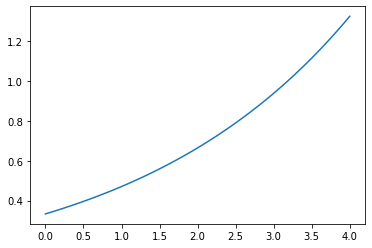

Exactly where football prob = 0.99: 
3.156457016627403


In [76]:
def p_f_given_n(n):
    prob = ((1/3)*(2/3)**n)/((17/36)**n)
    xpoints = np.linspace(0,n)
    ypoints = ((1/3)*(2/3)**xpoints)/((17/36)**xpoints)
    
    plt.plot(xpoints,ypoints, color = 'tab:blue')
    plt.show()
    
    # Show us how high n has to be for a ~99% chance a football was taken

    max_x = np.interp(0.99,ypoints,xpoints)
    
    print ("Exactly where football prob = 0.99: ")
    print (max_x)

p_f_given_n(4)


## (30 pts) Problem 2: Boxplots and Reshaping Data
***

The recent [Marshall fire](https://www.bouldercounty.org/disasters/wildfires/marshall/) has had a devastating and profound effect on many members of the CU community.  As we support those members, we also may be interesting in attempting to understand whether or not we could have anticipated any of the risk factors involved in the fire.  We attempt an exploratory analysis of that here.

Load in the data in `boulder_daily_weather.csv`


Information on the file is as follows:

- Temperatures are in degrees Fahrenheit and snow and precipitation are in inches.
- Precipitation is the total liquid equivalent of all forms of precipitation (rain, snow, hail,...).
- Missing values are indicated by -998.0.
- Trace values (less than 1/10 for snow and 1/100 for rain) are indicated by -999.0.
- Your file starts in 1970, although limited data goes back to 1899 from NOAA.

In [77]:
df=pd.read_csv('../data/boulder_daily_weather.csv', encoding='UTF-8')
print(df.dtypes)
df.head(20)

Year           int64
Month          int64
Day            int64
MaxT           int64
MinT           int64
Precip       float64
Snow           int64
SnowDepth      int64
dtype: object


,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
0,1970,1,1,32,19,-999.0,-999,3
1,1970,1,2,33,15,0.0,0,3
2,1970,1,3,29,14,0.0,0,2
3,1970,1,4,33,9,0.0,0,2
4,1970,1,5,18,3,0.1,2,4
5,1970,1,6,25,-3,0.0,0,4
6,1970,1,7,26,-3,-999.0,-999,4
7,1970,1,8,18,-2,0.0,0,4
8,1970,1,9,36,5,0.0,0,3
9,1970,1,10,48,25,0.0,0,3


In [78]:
df.tail(2)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
19030,2021,12,30,44,16,0.00,0,0
19031,2021,12,31,44,25,0.26,4,4


### A) Clean and scrub data
We need to pre-process a little to use this, since negative rainfall seems like it might not work well numerically.  Since we're trying to calculate the intensity of the drought, we're also going to make the assumption that "trace" rainfall doesn't actually help with water tables/crops/etc, and that the "missing" values might as well be "0's".

- Replace all "trace" fill values with 0
- Replace all "missing" data values with 0

We'll work with only the `Precip` column here, but feel free to clean the other columns if you wish.

In [79]:
df['Precip'] = df['Precip'].replace(-998,0)
df['Precip'] = df['Precip'].replace(-999,0)

df.head(5)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
0,1970,1,1,32,19,0.0,-999,3
1,1970,1,2,33,15,0.0,0,3
2,1970,1,3,29,14,0.0,0,2
3,1970,1,4,33,9,0.0,0,2
4,1970,1,5,18,3,0.1,2,4


### B) Explore a Pattern

What months are the most dangerous for low-rainfall conditions?  Make a new data frame that totals the precipitation for each month since 1970.  The result should be 12 columns for the months and 52 rows for the years. Then create a box plot of the data, resulting in 12 side-by-side plots of monthly precipitation.  Which month looks to be the wettest?  The driest? The most variable?

(*Hint:* I recommend a double loop over `(month, year)` pairs for ease of implementation.)

Text(0.5, 0, '')

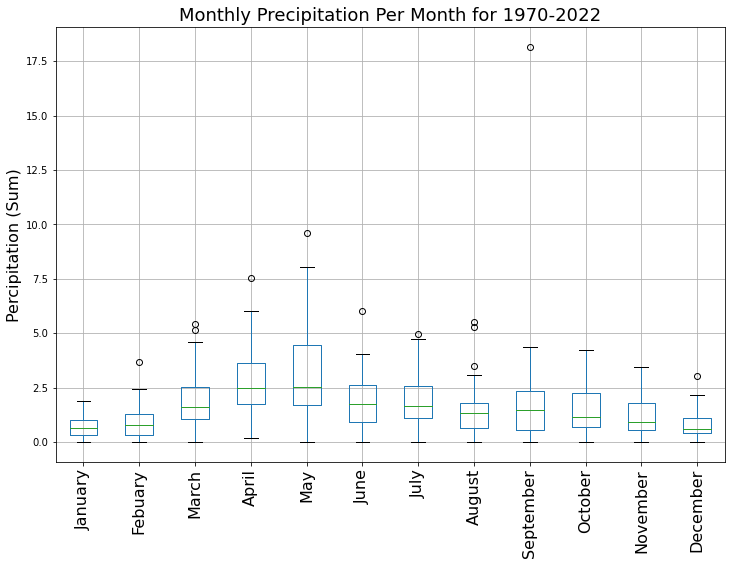

In [80]:
month_sum_list = []
for i in range (1970,2022):
    row = []
    for j in range (12):
        row.append(df.loc[(df["Year"] == i) & (df["Month"] == j+1), "Precip"].sum())
    month_sum_list.append(row)    

# test = df.loc[(df["Year"] == 1971) & (df["Month"] == 12), "Precip"].sum()

# print(test)

mastersum = pd.DataFrame(month_sum_list, columns = ('January','Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', "November", 'December') )
    
# mastersum.head(5)

# Pulled from n3

# Initialize figure 
fig, ax = plt.subplots(figsize=(12,8))

# plot boxplots of sum of rain for each month from 1970-2022

bp = mastersum.boxplot(column= ['January','Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', "November", 'December'])

# Threw errors, non-issue, decided to comment out for ease

# for column in mastersum:
    
#     # Change properties in boxes 
#     for box in column['boxes']:
#         box.set(color='steelblue', linewidth=2)
    
#     # Change properties of whiskers 
#     for whisker in column['whiskers']:
#         whisker.set(color='gray', linewidth=2)

#     # Change properties of caps 
#     for cap in column['caps']:
#         cap.set(color='gray', linewidth=2)

#     # Change properties of median 
#     for cap in column['medians']:
#         cap.set(color='green', linewidth=2, alpha=0.5)

#     # Change properties of fliers (outliers) 
#     for cap in column['fliers']:
#         cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# title and vertical axis label
ax.set_title('Monthly Precipitation Per Month for 1970-2022', fontsize=18)
ax.set_ylabel("Percipitation (Sum)", fontsize=16)

# names of plots
short_names = ['January','Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', "November", 'December']
plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)


plt.suptitle("")
ax.set_xlabel("")







Which month looks to be the wettest? The driest? The most variable?

A. Generally, the month that looked to be the wettest was May, whereas the driest moneths looked to be either January or December. It seems like September has an unusual outlier, but otherwise ever other month seemed to be fairly consistant in comparison.

For the rest of the problem, we will use the original data frame with the **daily** data.

### C) Create four new columns to track drought intensity:

- `DaysRainless` that holds the number of days since the last non-trace precipitation.  In other words, this column will have a "0" if there was Precip>0 on that day, and otherwise will hold the number of days back since the last observed Precip>0.

- `DaysUnimpressive` that holds the number of days since the last *significant* precipitation, where it rained at least .1 inches in a calendar day.  In other words, this column will have a "0" if there was Precip>.1 on that day, and otherwise will hold the number of days back since the *last* observed Precip>.10.

- `Precip30` that holds the cumulative amount of precipitation in the last 30 days, including the day in question.
 
- `Precip120` that holds the cumulative amount of precipitation in the last 120 days, including the day in question.

Because each of these look "backwards" and require data prior to date you enter them in, you may want to begin calculating them starting in or slightly before 1971, then remove or `drop` the 1970 data from the data frame afterwards, since you can't calculate values for 1970 without the 1969 data.

(*Hints*: A simple loop should be good for all of these, but careful with using indices: 1970 was a leap year!  I recommend using slicing to "go back" 30/120 days for the Precip variables, and using a counter/incrementor to count "days since" on the other two.)

In [81]:
DaysRainless = []
counter = 0
for i in df['Precip']:
    if (i > 0):
        DaysRainless.append(0)
        counter = 1
        
    else:
        DaysRainless.append(counter)
        counter = counter + 1
        
df['DaysRainless'] = DaysRainless

df.head(10)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth,DaysRainless
0,1970,1,1,32,19,0.0,-999,3,0
1,1970,1,2,33,15,0.0,0,3,1
2,1970,1,3,29,14,0.0,0,2,2
3,1970,1,4,33,9,0.0,0,2,3
4,1970,1,5,18,3,0.1,2,4,0
5,1970,1,6,25,-3,0.0,0,4,1
6,1970,1,7,26,-3,0.0,-999,4,2
7,1970,1,8,18,-2,0.0,0,4,3
8,1970,1,9,36,5,0.0,0,3,4
9,1970,1,10,48,25,0.0,0,3,5


In [82]:
DaysUnimpressive = []
counter = 0
for i in df['Precip']:
    if (i < 0.1):
        counter = counter + 1
        DaysUnimpressive.append(counter - 1)
    else:
        DaysUnimpressive.append(0)
        counter = 1
        

        
df['DaysUnimpressive'] = DaysUnimpressive

df.head(5)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth,DaysRainless,DaysUnimpressive
0,1970,1,1,32,19,0.0,-999,3,0,0
1,1970,1,2,33,15,0.0,0,3,1,1
2,1970,1,3,29,14,0.0,0,2,2,2
3,1970,1,4,33,9,0.0,0,2,3,3
4,1970,1,5,18,3,0.1,2,4,0,0


In [89]:


Precip30 = []

for i in range(30):
    Precip30.append(0)
    

index = 30

while (index != len(df)):
    rain30 = 0
    for i in range(index, index-30, -1):
        rain30 = rain30 + df['Precip'].values[i]
        
    Precip30.append(rain30)
    index = index + 1
        
df['Precip30'] = Precip30

df.head(31)



,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth,DaysRainless,DaysUnimpressive,Precip30
0,1970,1,1,32,19,0.0,-999,3,0,0,0.0
1,1970,1,2,33,15,0.0,0,3,1,1,0.0
2,1970,1,3,29,14,0.0,0,2,2,2,0.0
3,1970,1,4,33,9,0.0,0,2,3,3,0.0
4,1970,1,5,18,3,0.1,2,4,0,0,0.0
5,1970,1,6,25,-3,0.0,0,4,1,1,0.0
6,1970,1,7,26,-3,0.0,-999,4,2,2,0.0
7,1970,1,8,18,-2,0.0,0,4,3,3,0.0
8,1970,1,9,36,5,0.0,0,3,4,4,0.0
9,1970,1,10,48,25,0.0,0,3,5,5,0.0


In [93]:
Precip120 = []

for i in range(120):
    Precip120.append(0)
    

index = 120

while (index != len(df)):
    rain30 = 0
    for i in range(index, index-120, -1):
        rain30 = rain30 + df['Precip'].values[i]
        
    Precip120.append(rain30)
    index = index + 1
        
df['Precip120'] = Precip120

df.head(121)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth,DaysRainless,DaysUnimpressive,Precip30,Precip120
0,1970,1,1,32,19,0.0,-999,3,0,0,0.00,0.00
1,1970,1,2,33,15,0.0,0,3,1,1,0.00,0.00
2,1970,1,3,29,14,0.0,0,2,2,2,0.00,0.00
3,1970,1,4,33,9,0.0,0,2,3,3,0.00,0.00
4,1970,1,5,18,3,0.1,2,4,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1970,4,26,78,48,0.0,0,0,5,8,2.22,0.00
117,1970,4,27,78,50,0.0,0,0,6,9,2.22,0.00
118,1970,4,28,73,42,0.0,0,0,7,10,1.87,0.00
119,1970,4,29,58,35,0.0,0,0,8,11,0.84,0.00


### D) Measure Extremity

Suppose we were tasked with using data-based methods to predict fire risk based on this data.  One way we might do so is determine where or not the weather has been unsually dry in the recent months.  There are two common ways we measure "extremity" of an observation (among others).

- A **Z-score**.  The **Z-score** for an observation $X_i$ is given by $$Z_i=\frac{X_i-\bar{X}}{s_X},$$where $\bar{X}$ are the mean and standard deviation of the measurement $X$, as usual.  We interpret it with the sentence: how many standard deviations above or below the average value for $X$ was the $i$th observation?  Values near 0 are "close to average" and values exceeding $\pm 2$ tend to be considered "large."

- A proportion.  A data is extreme if it is one of the largest or smallest observations in a data set.  We can compute it by counting the *proportions* of data values less than or greater than the observation in question.  In other words: a drought might be considered extreme if only 1% of days had **less** recent rainfall, or if only 1% of days had **more** days-since-last-precipitation. 

Using these measures, calculate "how extreme" the drought in Boulder on Dec 30 2021 was.  Output your results into a 4x2 table where each row is one of the 4 measures created in **C** and the two columns are Z-scores and "extremity proportion."

Does it appear to be extremely dry by any of the measures?  In the top 1% of "driest" conditions?  Which ones?

### E) Make some More Pictures

Does it feel like droughts might be getting worse over time?  Make a plot of three side-by-side box plots of the values of `DaysUnimpressive` taken for:
- Years 1971-1990
- Years 1991-2010
- Years 2011-present

Does there appear to be a difference in the boxplots in the medians?   In the Quartiles?  What about in the whiskers or prevalance of outliers?

A. The medians for each box plot actually stay fairly consistant near ~10 days without impressive rain despite differences between the different time intervals. The quarties also reflect similar behaviour with a larger top end then bottom. Even the min whisker (predicatbly 0) and the max whisker (around 30 usually) don't vary too much between 20 year intervals. What is noticable is the outliers, where between 1971 and 1990 there were noticably worse droughts where impressive rainfall was not witnessed for up to 250 consecutive days in some cases. This is drastically different from the outliers in subsequent 20 year intervals, with outliers of unimpressive rain usually between 70 and 90 consecutive days.

(I couldn't figure out how to put them side to side, better to have them indvidiually then none at all)

Text(0.5, 0, '')

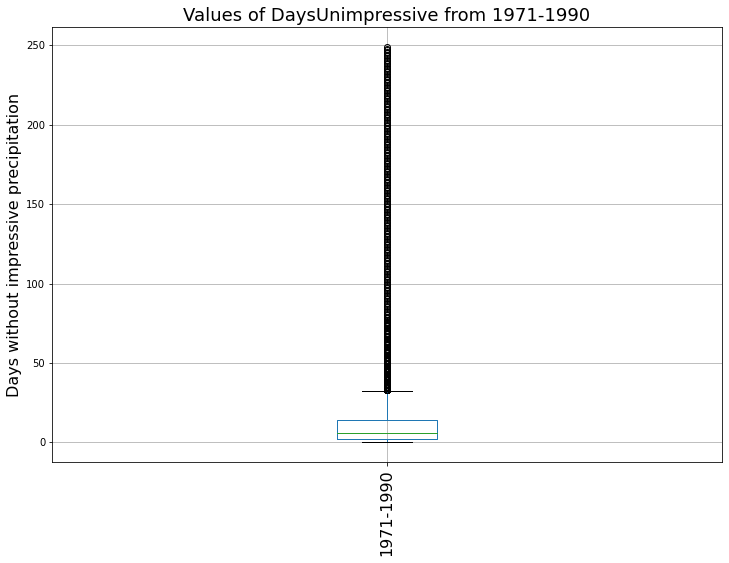

In [41]:

# Pulled from n3

# Initialize figure 
fig, ax = plt.subplots(figsize=(12,8))

# plot boxplots of sum of rain for each month from 1970-2022

bp = df.loc[(df["Year"] >= 1971) & (df["Year"] <= 1990)].boxplot(column = ["DaysUnimpressive"])




# title and vertical axis label
ax.set_title('Values of DaysUnimpressive from 1971-1990', fontsize=18)
ax.set_ylabel("Days without impressive precipitation", fontsize=16)

# names of plots
short_names = ['1971-1990']
plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)


plt.suptitle("")
ax.set_xlabel("")

# plt.subplot(1,2,1)
# bp2 = df.loc[(df["Year"] >= 1991) & (df["Year"] <= 2010)].boxplot(column = ["DaysUnimpressive"])

# ax.set_title('Monthly Precipitation Per Month for 1970-2022', fontsize=18)
# ax.set_ylabel("Percipitation (Sum)", fontsize=16)

# # names of plots
# short_names = ['1971-1990', '1991-2010', '2011-2022']
# plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)
# # bp3 = df.loc[(df["Year"] >= 2011) & (df["Year"] <= 2022)].boxplot(column = ["DaysUnimpressive"])

Text(0.5, 0, '')

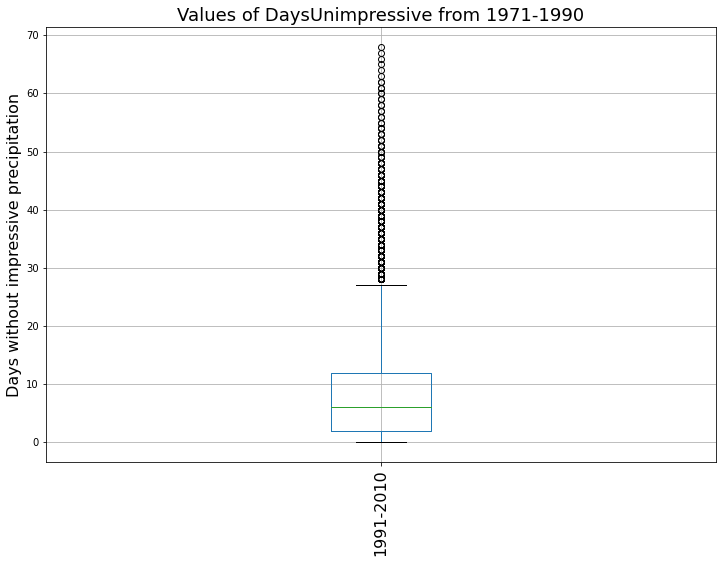

In [44]:
# Pulled from n3

# Initialize figure 
fig, ax = plt.subplots(figsize=(12,8))

# plot boxplots of sum of rain for each month from 1970-2022

bp2 = df.loc[(df["Year"] >= 1991) & (df["Year"] <= 2010)].boxplot(column = ["DaysUnimpressive"])




# title and vertical axis label
ax.set_title('Values of DaysUnimpressive from 1971-1990', fontsize=18)
ax.set_ylabel("Days without impressive precipitation", fontsize=16)

# names of plots
short_names = ['1991-2010']
plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)


plt.suptitle("")
ax.set_xlabel("")

# plt.subplot(1,2,1)
# bp2 = df.loc[(df["Year"] >= 1991) & (df["Year"] <= 2010)].boxplot(column = ["DaysUnimpressive"])

# ax.set_title('Monthly Precipitation Per Month for 1970-2022', fontsize=18)
# ax.set_ylabel("Percipitation (Sum)", fontsize=16)

# # names of plots
# short_names = ['1971-1990', '1991-2010', '2011-2022']
# plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)
# # bp3 = df.loc[(df["Year"] >= 2011) & (df["Year"] <= 2022)].boxplot(column = ["DaysUnimpressive"])

Text(0.5, 0, '')

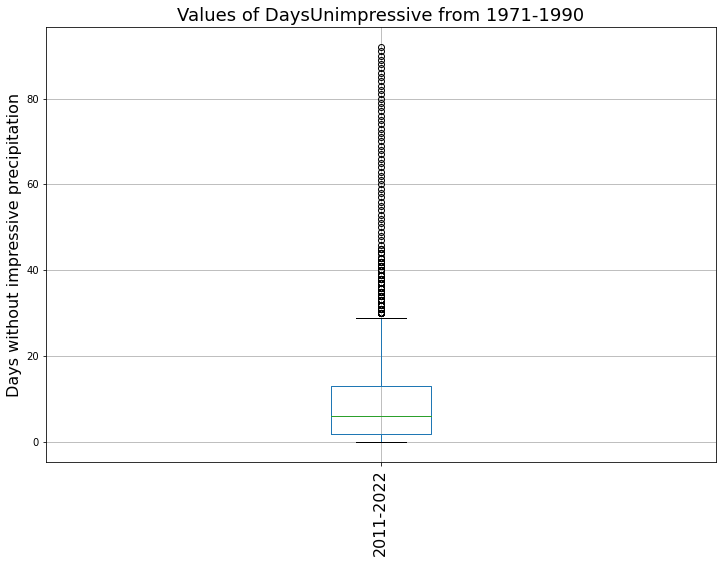

In [46]:
# Pulled from n3

# Initialize figure 
fig, ax = plt.subplots(figsize=(12,8))

# plot boxplots of sum of rain for each month from 1970-2022

bp3 = df.loc[(df["Year"] >= 2011) & (df["Year"] <= 2022)].boxplot(column = ["DaysUnimpressive"])




# title and vertical axis label
ax.set_title('Values of DaysUnimpressive from 1971-1990', fontsize=18)
ax.set_ylabel("Days without impressive precipitation", fontsize=16)

# names of plots
short_names = ['2011-2022']
plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)


plt.suptitle("")
ax.set_xlabel("")

# plt.subplot(1,2,1)
# bp2 = df.loc[(df["Year"] >= 1991) & (df["Year"] <= 2010)].boxplot(column = ["DaysUnimpressive"])

# ax.set_title('Monthly Precipitation Per Month for 1970-2022', fontsize=18)
# ax.set_ylabel("Percipitation (Sum)", fontsize=16)

# # names of plots
# short_names = ['1971-1990', '1991-2010', '2011-2022']
# plt.xticks(range(1,len(short_names)+1),short_names, rotation=90, fontsize=16)


### F) Discuss

Does it seem like these measures are working?  Skim the [USGS introductory material](https://www.usgs.gov/faqs/why-doesnt-drought-end-when-it-rains) and its associated pages on droughts and rainfall.  Are our measures able to capture some of the ideas there-in?  Why or why not?  In a markdown cell, use a few sentences to describe strengths and weaknesses of our calculations in estimating drought intensity.

Based on the USGS information on droughts and rainfall, our measures may not be able to fully grasp the entire picture due to the nature of what is classified as a "drought". Based on data alone, we can see a cumulative month to month sum of rainfall but cannot determine if it was all at once or over the month. If it was indeed the result of one or two major storms, we cannot attribute it to avoiding a drought or solving a drought, which may require extensive rainfall to be considered gone. Using counters such as DaysRainless or even a more focused DaysUnimpressive does give context to just how long rain had occured between days can only give us a timetable, but cannot determine the type of rain or environmental conditions that would actually determine drought or no drought. We can get a fairly simple picture, but we cannot see the effect of different storms, tempurature, environmental factors, etc. that would help use better understand drough intensity in 20 year intervals.  